# Prediction in Time-series Dataset By : 
# Shikhar Garg
# 101917064

In [38]:
#importing libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

In [39]:
#importing dataset
df = pd.read_excel('DATASET.xlsx')

In [40]:
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1006,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1007,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1008,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [41]:
#Proving each section with similar section name
j = 0
for i in range(100):
    df.iloc[j:j + 10, 0] = df.iloc[j, 0]
    j += 10

In [42]:
#Replacing empty cells with zero
df.fillna(0, inplace=True)
#Renaming first column
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')

In [43]:
#Test Dataset
test_data = df.loc[df['year'] == 10]
test_data

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
979,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
989,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
999,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [44]:
test_data.columns = test_data.columns.str.replace('Unnamed: 0', 'Group')

In [45]:
etr = ExtraTreesRegressor(n_estimators=100,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1200,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.0,
                    n_jobs=None, oob_score=False, random_state=42, verbose=0,warm_start=False)

In [46]:
predicted = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [47]:
res = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [48]:
rf = RandomForestRegressor(n_estimators = 100, min_samples_split=2, min_samples_leaf=1, max_features=1.0, random_state = 42)

In [49]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0
    if(val==0):
        for j in range(10,15):
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]
                etr.fit(xtrain, ytrain)
                ypred = etr.predict(xtest.reshape(1,-1))[0]
                res[predicted[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1
            RMSE.append(ans)
            index += 1   
    else:
        for j in range(10,15):
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]
                rf.fit(xtrain, ytrain)
                ypred = rf.predict(xtest.reshape(1,-1))[0]
                res[predicted[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1
            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [50]:
import warnings
warnings.filterwarnings('ignore')

res_RMSE, res_count = selectedModel(1)

In [51]:
pred = pd.DataFrame.from_dict(res)
pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.707,53.966,41.61,7.67,1.893400
1,56.621,27.907,0.90,7.73,0.788960
2,64.404,0.000,0.00,11.42,1.361070
3,16.026,53.980,59.04,6.96,1.812030
4,0.000,250.313,33.90,5.91,1.696570
...,...,...,...,...,...
95,0.000,112.641,15.04,3.73,1.356560
96,160.167,178.869,8.76,7.22,1.494210
97,4.116,60.155,22.37,11.76,1.065249
98,98.101,53.432,11.98,10.76,0.907400


In [52]:
#RMSE for each column
for i in res_RMSE:
    print((i/res_count)**0.5)

65.4725011461942
63.80949746448412
26.014670433430446
14.827907809262912
0.22963478381048907


In [53]:
print(res_RMSE)

[428664.8406338402, 407165.1966670005, 67676.30777600002, 21986.685000000005, 5.273213393569006]


In [54]:
#Total RMSE
print((sum(res_RMSE)/500)**0.5)

43.02321009153627


In [55]:
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

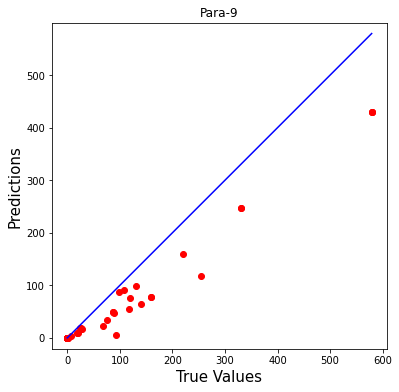

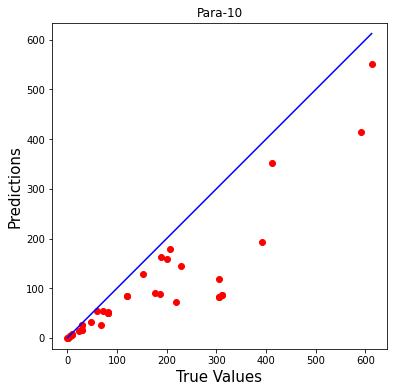

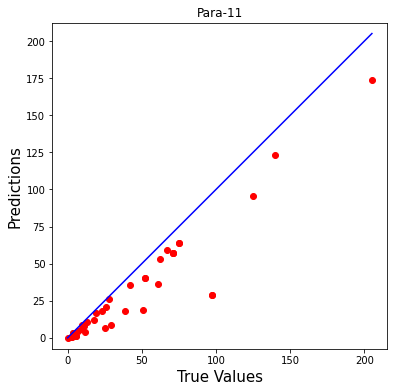

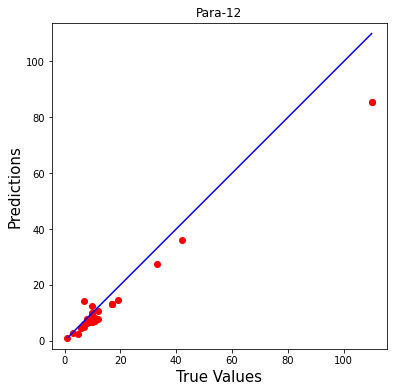

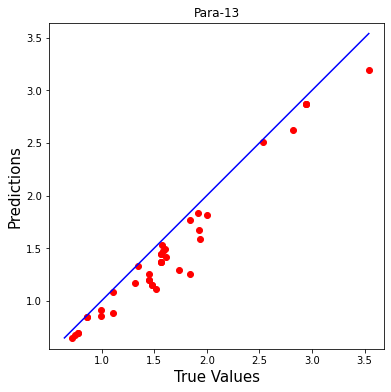

In [56]:
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_data.iloc[ind, i+10]
    p_value = pred.iloc[ind, i]
    plt.scatter(true_value, p_value, c='red')
    
    p1 = max(max(p_value), max(true_value))
    p2 = min(min(p_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predicted[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()